In [1]:
import seaborn as sns

# Similar functions for similar tasks
* 네임스페이스 : 내부 식별자에 사용될 수 있는 유효범위를 제공하는 선언적 영역
* seaborn의 네임스페이스는 평면적이라 모든 기능을 최상위 수준에서 액세스 할 수 있다.
* 그러나, 코드 자체는 서로 다른 수단을 통해 유사한 시각화 목표를 달성하는 함수모듈이다. (계층구조)
* 모듈에는 관계형, 분산형(distributions), 범주형 등이 있다.

In [2]:
# 분산형 모듈

* 데이터 포인트의 분포를 나타내는데 특화된 함수.
* 히스토그램 등이 포함됨.

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Count'>

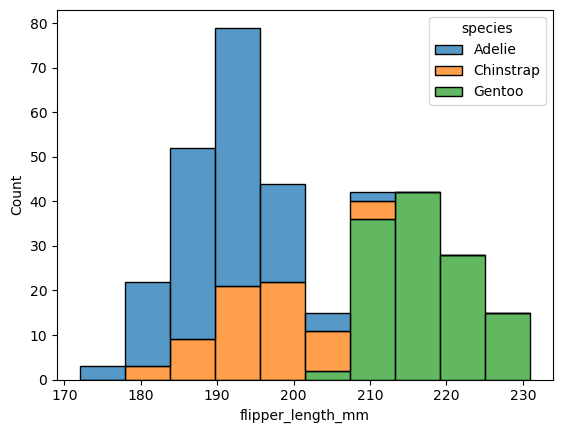

In [3]:
penguins = sns.load_dataset("penguins")
sns.histplot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack")

# data : 입력 데이터
# hue : 범주로 사용할 컬럼명
# multiple='stack' : 그래프를 그리는 방식, 쌓인 형태의 히스토그램 출력

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Density'>

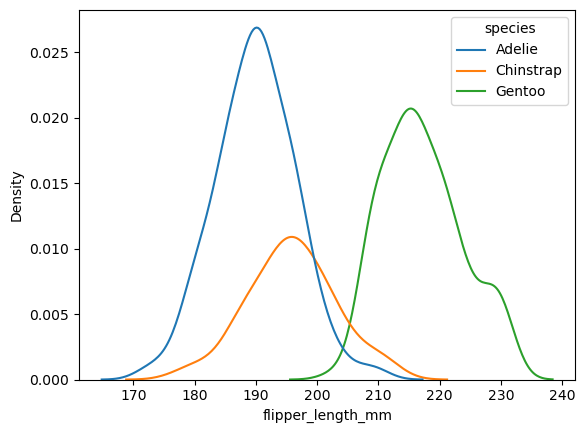

In [4]:
# 또 다른 옵션 사용해보기
sns.kdeplot(data=penguins, x='flipper_length_mm', hue='species')

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Density'>

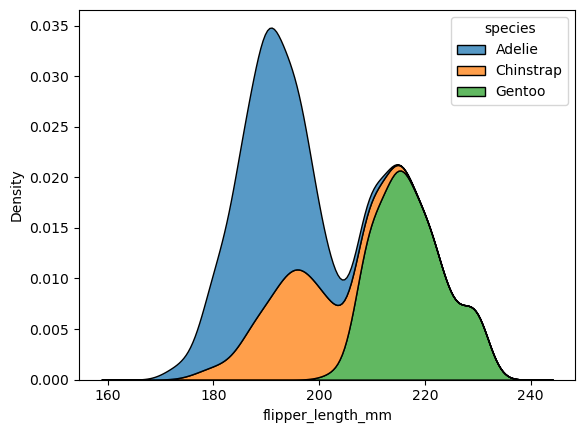

In [5]:
sns.kdeplot(data=penguins, x='flipper_length_mm', hue='species', multiple='stack')

* 'multiple="stack"' 모듈 내의 함수는 많은 기본코드를 공유하고, 라이브러리의 다른 구성요소에는 없을 수 있는 유사한 기능을 제공한다.
* 다양한 표현에는 보완적인 강점과 약점이 있는 경우가 많기 때문에 다양한 시각적 표현 간 전환을 용이하도록 설계되었다.

# Figure-level vs. axes-level functions
* seaborn 기능은 '축'과 '그림' 수준으로 분류된다.
* 위의 예(kdeplot)는 축 수준의 함수이다.matplotlib.pyplot.Axes 함수의 반환 값인 단일 개체에 데이터를 표시한다.
* 그림수준 함수 FacetGrid는 그림을 관리하는 seaborn 객체를 통해 matplotlib과 인터페이스 한다.
* 각 모듈에는 다양한 축 수준 기능에 대한 단일 인터페이스를 제공하는 단일그림수준 기능이 있다.
* 조직의 예)
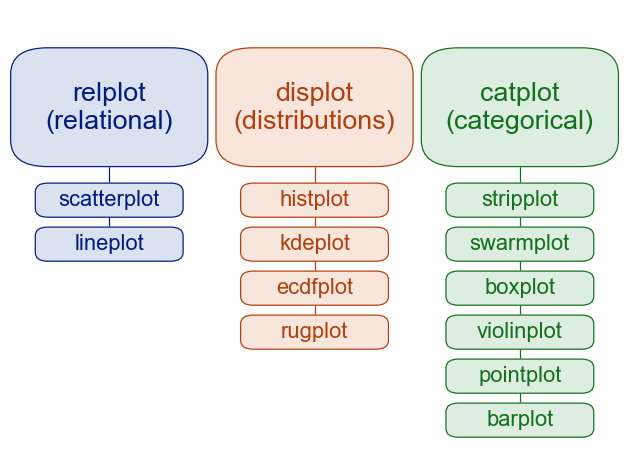

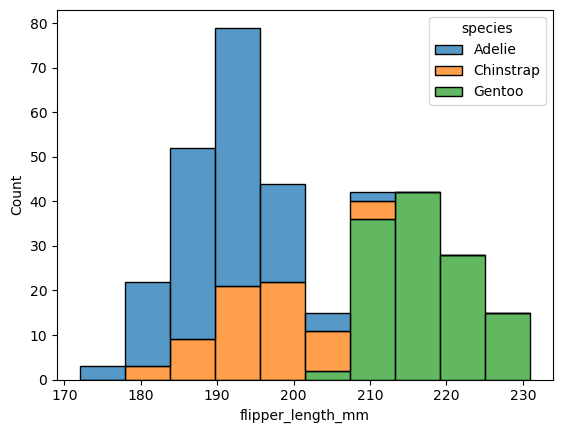

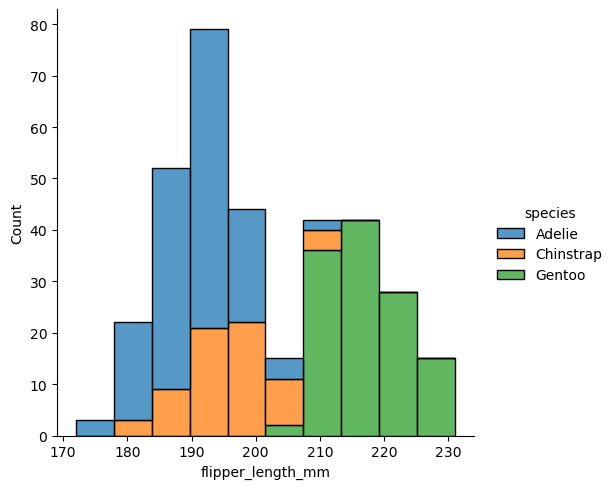

In [6]:
# displot() : 그림수준 함수.
hist = sns.histplot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack")
dis = sns.displot(data=penguins, x='flipper_length_mm', hue='species', multiple='stack')

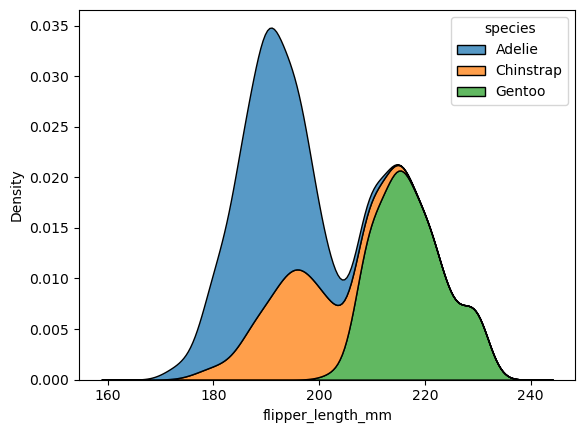

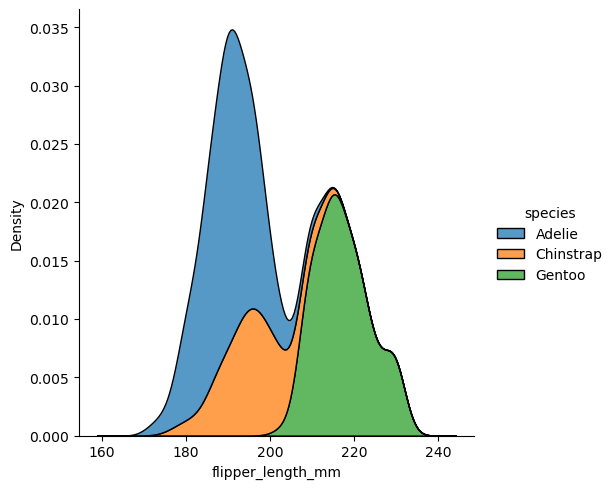

In [7]:
kde = sns.kdeplot(data=penguins, x='flipper_length_mm', hue='species', multiple='stack')
dis_2 = sns.displot(data=penguins, x='flipper_length_mm', hue='species', multiple='stack', kind='kde')

* 비슷해 보이지만 displot(figure수준)은 몇 가지 차이점을 가지고 있다.
* 범례 : 그래프 외부에 배치된다. 모양도 살짝 다르다.
* figure 수준 함수가 제공하는 가장 유용한 기능은 여러 서브플롯이 있는 figure를 쉽게 생성할 수 있다는 것이다.

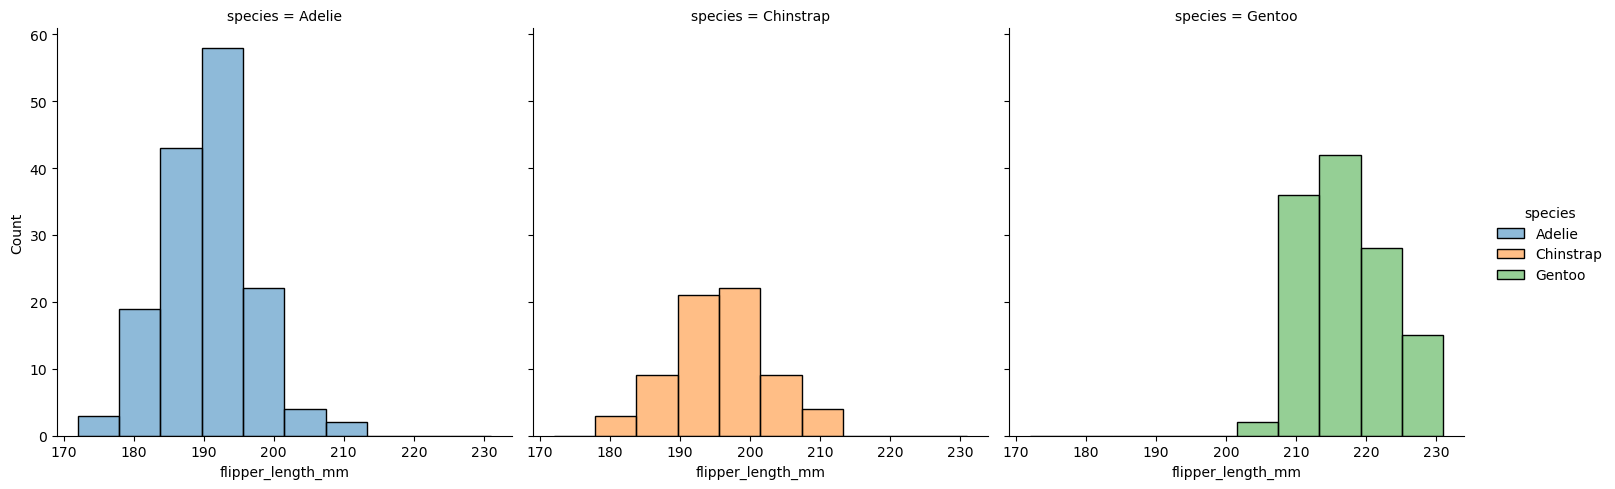

In [8]:
# ex) 동일한 축에 각각의 세 가지 분포를 표현하는 대신 그림의 열에 걸쳐 각 분포를 한 줄에 구현해낼 수 있음.

sns.displot(data=penguins, x='flipper_length_mm', hue='species', col='species')

* figure 수준의 함수는 해당하는 축 함수를 래핑하고 종류별 키워드 인수를 기본함수로 전달한다.
* 단점 : 종류별 매개변수가 함수 서명이나 doc string에 나타나지 않는다.또, 일부 기능은 검색하기 어렵다.

## Axes-level functions make self-contained plots
* 축 수준의 함수는 독립적인 plot을 만든다.
* 축 레이블과 범례를 자동으로 추가하지만, 그려지는 축 이외의 항목은 수정하지 않는다.
* 즉, 예측 가능한 결과와 함께 임의로 복잡한 matplotlib 수치로 구성될 수 있다.
* ax= 를 사용하여 각 plot이 어디로 가야하는지 정확하게 지정할 수 있다. (subplots의 위치 지정)

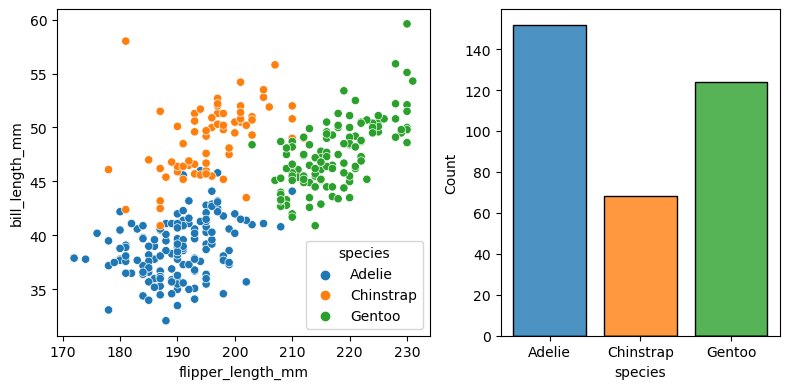

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

f, axs = plt.subplots(1, 2,
                    figsize= (8,4),
                    gridspec_kw=dict(width_ratios=[4,3]))
sns.scatterplot(data=penguins,
               x='flipper_length_mm',
               y='bill_length_mm',
               hue='species',
               ax=axs[0])
sns.histplot(data=penguins,
            x='species',
            hue='species',
            shrink=.8,   # 막대그래프 너비
            alpha=.8,   # 막대그래프 채도 올라감
            legend=False,
            ax=axs[1])
f.tight_layout()   # 레이아웃 꽉 채운 사이즈로 출력

## Figure-level functions own their figure
* 그림수준의 함수는 자신의 그림을 소유한다.
* 하지만 그림수준함수는 다른 plot과 함께 구성되기 어렵다.
* 특성상 초기화를 포함하여 고유한 그림을 소유하기 때문에, 그림수준함수를 사용하여 기존축에 plot을 그리는 개념이 없다.
* 대신, 범례를 plot 외부에 배치하는 것과 같은 기능을 구현해낼 수 있다.
* 그러나, 반환하는 객체의 matplotlib 축에 액세스하고 plot에 다른 요소를 추가하여 그림수준함수가 제공하는 것 이상을 수행할 수도 있다.

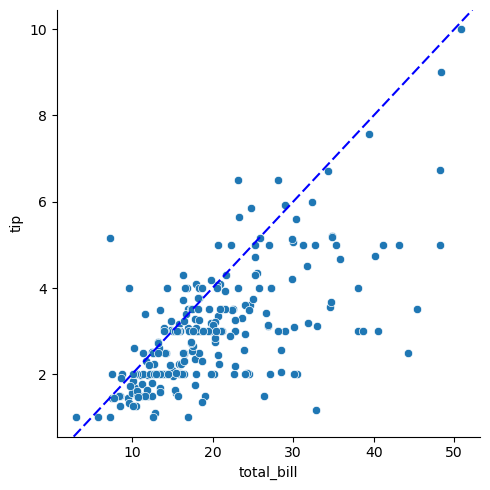

In [10]:
tips = sns.load_dataset("tips")
g = sns.relplot(data=tips, x="total_bill", y="tip")
g.ax.axline(xy1=(10, 2), slope=.2, color="b", dashes=(5, 2))

## Customizing plots from a figure-level function
* 그림수준함수 'FacetGrid'는 서브플롯 구성에 대해 스마트한 방식으로 플롯 속성 정의를 위한 인스턴스를 반환한다.
* ex) 한 줄의 코드로 외부 축의 레이블을 변경할 수 있다. 

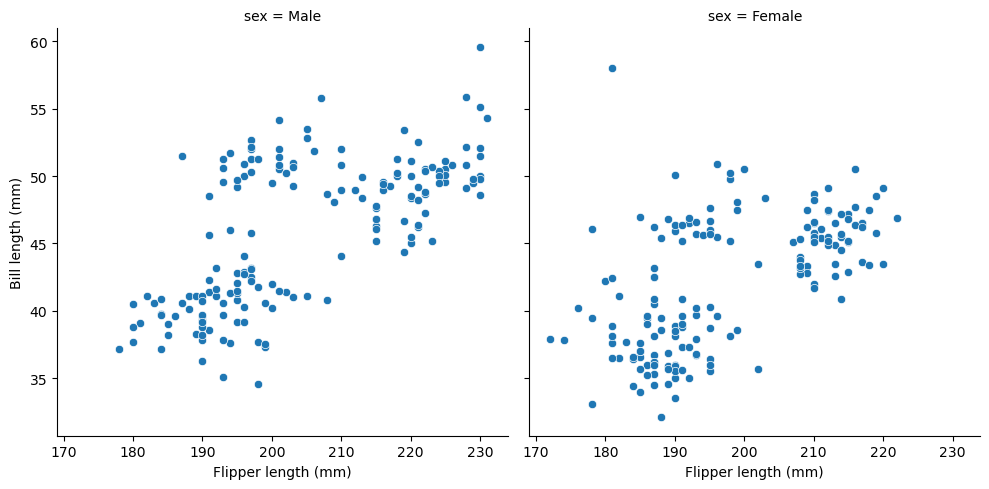

In [11]:
g = sns.relplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", col="sex")
g.set_axis_labels("Flipper length (mm)", "Bill length (mm)")

In [12]:
# 그러나 위의 방법은 matplotlib API가 아님.
# 또한, 그림수준함수를 사용할 때만 사용 가능한 코드임.

## Specifying figure sizes
* matplotlib 플롯의 크기를 늘리거나 줄이려면 : `matplotlib.pyplot.subplots()`에서 `figsize`를 사용
* 혹은 `matplotlib.Figure.set_size_inches()
* 플롯의 크기는 플롯이 속한 그림의 크기와 해당 그림의 축 레이아웃에 따라 결정된다.

* 그림 수준 함수를 사용할 때 몇 가지 주요 차이점
1. 함수 자체에는 그림 크기를 제어하는 매개변수가 있다. : `FacetGrid`
2. `height`, `aspect`는 `width`와 다르게 사이즈를 조절한다. (width = height * aspect)

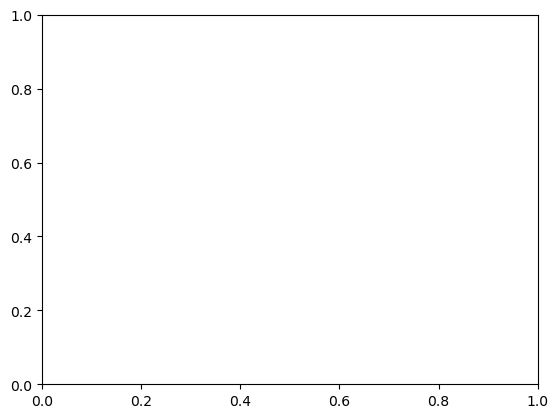

In [13]:
#  서브플롯 만들어보기
#  서브플롯 기본출력
f, ax = plt.subplots()

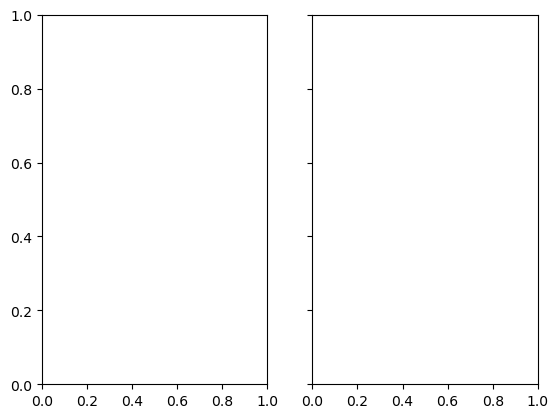

In [14]:
# 1행 2열로 출력하기  : 전체 크기는 동일하지만 가로 길이가 짧아진 두 개의 그래프가 그려짐
f, ax = plt.subplots(1, 2, sharey=True)

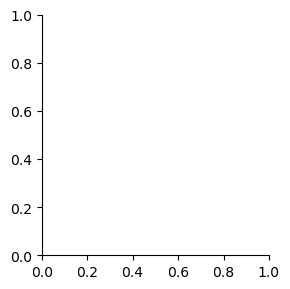

In [15]:
# Figure 함수로 만든 플롯은 정사각형임.
# FacetGrid를 사용하여 그려보기. 
g = sns.FacetGrid(penguins)
g

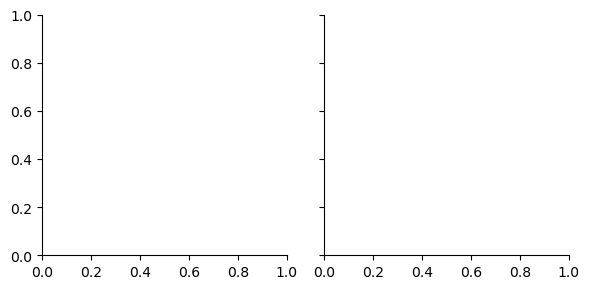

In [16]:
# 열이 추가되면 출력 공간이 넓어지고, 출력되는 모양은 그대로임.
g = sns.FacetGrid(penguins, col='sex')
g

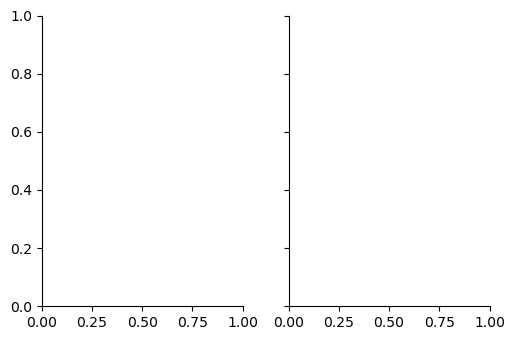

In [17]:
# 그림의 총 행과 열의 수를 고려하지 않고 서브플롯의 크기와 모양을 조절할 수 있음.
g = sns.FacetGrid(penguins, col='sex', height=3.5, aspect=.75)

- `FacetGrid`의 장점: 전체 그림크기를 설정하지 않아도 각 그림의 크기를 지정할 수 있음
- `FacetGrid`의 단점: 그림 크기를 변경하는 방법이 matplotlib과 다르다는 것을 기억해야함.

## Relative merits of figure-level functions